In [1]:
import requests
from os import path, getcwd, listdir
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

PROJECT_PATH = path.join(
    path.dirname(path.abspath(getcwd())),
)
### import custom lib
sys.path.append(PROJECT_PATH)
from utils.config_loader import load

In [2]:
config = load()

# Use of the API: query

In [3]:
url = "http://10.201.0.1:8080/api/v1/svc_ml/query"

payload="{\"gender\":\"Men\", \"season\":\"Fall\", \"year\":2010}"
headers = {
    'Content-Type': 'application/json',
    'accept': 'application/json'
}
response = requests.post(url, headers=headers, data=payload)

res = response.json()
res

{'task_id': '4bdf4bf5-9697-487c-a7f2-90b12695050d', 'status': 'Processing'}

In [4]:
url = f'http://10.201.0.1:8080/api/v1/svc_ml/result/{res["task_id"]}'
response_check = requests.get(url, headers=headers)

res_check = response_check.json()
res_check

{'task_id': '4bdf4bf5-9697-487c-a7f2-90b12695050d', 'status': 'ok'}

# Load results

In [5]:
# if res_check['status'] == 'ok'
task_id = res_check['task_id']

data_folder = config.get('data', 'folder')
output_folder = config.get('data', 'output')
# data_folder contains the path from within the container
# convert the result path to the local one
result_path = PROJECT_PATH + path.join(data_folder, output_folder)

task_path = path.join(result_path, str(task_id))
listdir(task_path)

['2814.jpg',
 '2350.jpg',
 '3240.jpg',
 '3214.jpg',
 '2015.jpg',
 '1544.jpg',
 '3478.jpg',
 '1673.jpg',
 '2193.jpg',
 '2231.jpg',
 '20877.jpg',
 '2204.jpg',
 '2400.jpg',
 '2543.jpg',
 '2212.jpg',
 '2330.jpg',
 '2480.jpg',
 '2090.jpg',
 '1833.jpg',
 '3225.jpg',
 '2202.jpg',
 '1617.jpg',
 '1620.jpg',
 '2331.jpg',
 '2328.jpg',
 '1615.jpg',
 '2274.jpg',
 '2488.jpg',
 '2499.jpg',
 '2963.jpg',
 '2255.jpg',
 '1919.jpg',
 '2091.jpg',
 '2089.jpg',
 '2235.jpg',
 '3740.jpg',
 '2207.jpg',
 '2045.jpg',
 '19241.jpg',
 '2031.jpg',
 '2032.jpg',
 '3219.jpg',
 '2040.jpg',
 '3229.jpg',
 '3486.jpg',
 '2044.jpg',
 '1995.jpg',
 '21178.jpg',
 '1841.jpg',
 '19410.jpg',
 '1787.jpg',
 '2972.jpg',
 '2500.jpg',
 '19499.jpg',
 '2227.jpg',
 '2332.jpg',
 '2038.jpg',
 '3232.jpg',
 '20804.jpg',
 '1922.jpg',
 '2242.jpg',
 '2969.jpg',
 '2312.jpg',
 '2234.jpg',
 '1636.jpg',
 '1785.jpg',
 '2012.jpg',
 '1536.jpg',
 '2994.jpg',
 '2275.jpg',
 '3481.jpg',
 '20794.jpg',
 '1689.jpg',
 '2256.jpg',
 '2284.jpg',
 '20295.jpg',
 '24

In [6]:
'metadata.csv' in listdir(task_path)

True

# Analysis of the metadata

In [7]:
df = pd.read_csv(path.join(task_path, 'metadata.csv'))
df.drop('Unnamed: 0', axis=1, inplace=True)
# correct the image path according to local env
df['url'] = PROJECT_PATH + df['url']
df.set_index('id', inplace=True)
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,url
id,,,,,,,,,,
3168,Men,Footwear,Shoes,Sports Shoes,White,Fall,2010.0,Sports,Nike Men's Incinerate MSL White Blue Shoe,/home/jovyan/data_pipeline/data/output/4bdf4bf...
2243,Men,Apparel,Topwear,Tshirts,White,Fall,2010.0,Sports,ADIDAS Men Stripe Polo White Polo T-shirt,/home/jovyan/data_pipeline/data/output/4bdf4bf...
3739,Men,Accessories,Headwear,Caps,Blue,Fall,2010.0,Sports,ADIDAS Men Delhi Daredevil Blue Cap,/home/jovyan/data_pipeline/data/output/4bdf4bf...
2620,Men,Apparel,Topwear,Tshirts,Blue,Fall,2010.0,Sports,Nike Men's Colors Team India T-shirt,/home/jovyan/data_pipeline/data/output/4bdf4bf...
1607,Men,Apparel,Bottomwear,Track Pants,Blue,Fall,2010.0,Sports,Reebok Men trackpant- male Track Pants,/home/jovyan/data_pipeline/data/output/4bdf4bf...


In [8]:
df.shape

(459, 10)

## histograms of some variables

In [9]:
plt.rcParams['figure.autolayout'] = True

<AxesSubplot:>

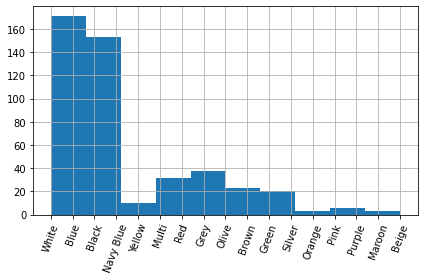

In [10]:
df['baseColour'].hist(xrot=70)

In [11]:
df['usage'].unique()

array(['Sports', 'Casual', 'Formal'], dtype=object)

array([[<AxesSubplot:title={'center':'Casual'}>,
        <AxesSubplot:title={'center':'Formal'}>],
       [<AxesSubplot:title={'center':'Sports'}>, <AxesSubplot:>]],
      dtype=object)

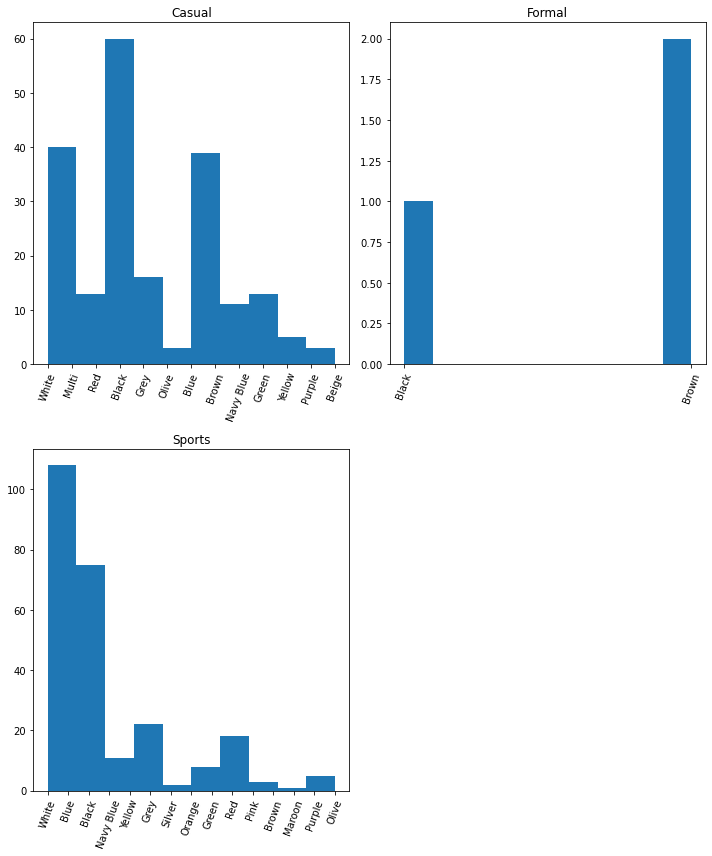

In [12]:
df['baseColour'].hist(xrot=70, by=df['usage'], figsize = (10,12), grid=True)

## num variables

In [13]:
df['year'].describe()

count     459.0
mean     2010.0
std         0.0
min      2010.0
25%      2010.0
50%      2010.0
75%      2010.0
max      2010.0
Name: year, dtype: float64

## object vataibles

In [14]:
df.select_dtypes(['object']).describe()

,gender,masterCategory,subCategory,articleType,baseColour,season,usage,productDisplayName,url
count,459,459,459,459,459,459,459,459,459
unique,1,3,11,16,17,1,3,453,459
top,Men,Apparel,Topwear,Tshirts,Black,Fall,Sports,Numero Uno Men's Casual Black Leatherette Shoe,/home/jovyan/data_pipeline/data/output/4bdf4bf...
freq,459,282,250,242,136,459,253,2,1


# Show images

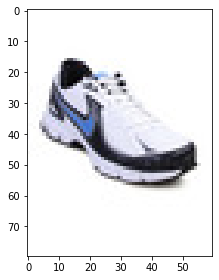

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName            Nike Men's Incinerate MSL White Blue Shoe
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 3168, dtype: object


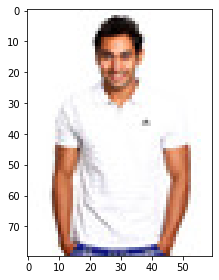

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName            ADIDAS Men Stripe Polo White Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 2243, dtype: object


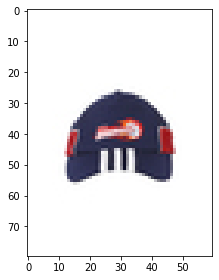

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                              Accessories
subCategory                                                    Headwear
articleType                                                        Caps
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                  ADIDAS Men Delhi Daredevil Blue Cap
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 3739, dtype: object


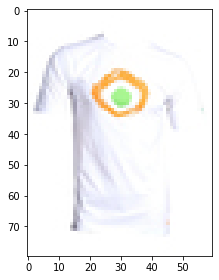

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                 Nike Men's Colors Team India T-shirt
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 2620, dtype: object


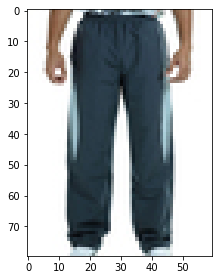

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                  Bottomwear
articleType                                                 Track Pants
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName               Reebok Men trackpant- male Track Pants
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 1607, dtype: object


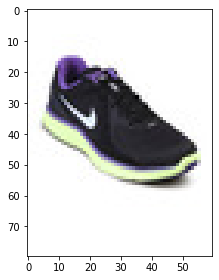

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        Black
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                     Nike Men's Lunarswift Black Shoe
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 3150, dtype: object


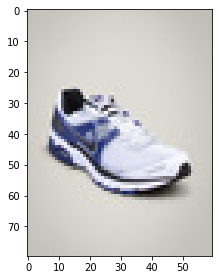

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName              Nike Men's Air Max Moto White Blue Shoe
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 3159, dtype: object


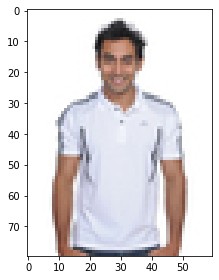

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Casual
productDisplayName                  ADIDAS Mens Fire White Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 2040, dtype: object


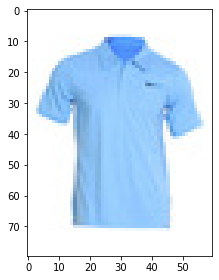

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                          Nike Mens Blue Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 2272, dtype: object


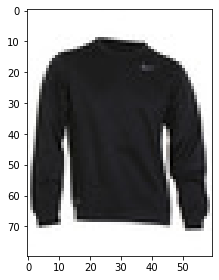

Image size:  (80, 60, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                 Sweatshirts
baseColour                                                        Black
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                            Nike Men Black Sweatshirt
url                   /home/jovyan/data_pipeline/data/output/4bdf4bf...
Name: 2286, dtype: object


In [15]:
for ind in range(df.iloc[:10].shape[0]):
    row = df.iloc[ind]
    img = mpimg.imread(row['url'])
    imgplot = plt.imshow(img)
    plt.show()
    print('Image size: ', img.shape)
    print(row)

# Transformed images

In [16]:
url = "http://10.201.0.1:8080/api/v1/svc_ml/transformedquery"

payload="{\"gender\":\"Men\", \"season\":\"Fall\", \"year\":2010}"
headers = {
    'Content-Type': 'application/json',
    'accept': 'application/json'
}
response_transform = requests.post(url, headers=headers, data=payload)

res_transform = response_transform.json()
res_transform

{'task_id': '39c004ea-ea72-4f30-86cc-55a170981b9b', 'status': 'Processing'}

In [17]:
url = f'http://10.201.0.1:8080/api/v1/svc_ml/result/{res_transform["task_id"]}'
response_check = requests.get(url, headers=headers)

res_check = response_check.json()
res_check

{'task_id': '39c004ea-ea72-4f30-86cc-55a170981b9b', 'status': 'Processing'}

In [20]:
# if res_check['status'] == 'ok'
task_id = res_check['task_id']
task_path = path.join(result_path, str(task_id))

df = pd.read_csv(path.join(task_path, 'metadata.csv'))
df.drop('Unnamed: 0', axis=1, inplace=True)

# correct the image path according to local env
df['url'] = PROJECT_PATH + df['url']
df.set_index('id', inplace=True)
df.head()

,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,url
id,,,,,,,,,,
3168,Men,Footwear,Shoes,Sports Shoes,White,Fall,2010.0,Sports,Nike Men's Incinerate MSL White Blue Shoe,/home/jovyan/data_pipeline/data/output/39c004e...
2243,Men,Apparel,Topwear,Tshirts,White,Fall,2010.0,Sports,ADIDAS Men Stripe Polo White Polo T-shirt,/home/jovyan/data_pipeline/data/output/39c004e...
3739,Men,Accessories,Headwear,Caps,Blue,Fall,2010.0,Sports,ADIDAS Men Delhi Daredevil Blue Cap,/home/jovyan/data_pipeline/data/output/39c004e...
2620,Men,Apparel,Topwear,Tshirts,Blue,Fall,2010.0,Sports,Nike Men's Colors Team India T-shirt,/home/jovyan/data_pipeline/data/output/39c004e...
1607,Men,Apparel,Bottomwear,Track Pants,Blue,Fall,2010.0,Sports,Reebok Men trackpant- male Track Pants,/home/jovyan/data_pipeline/data/output/39c004e...


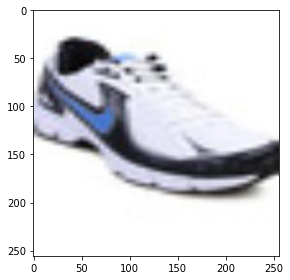

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName            Nike Men's Incinerate MSL White Blue Shoe
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 3168, dtype: object


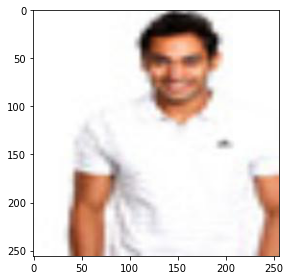

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName            ADIDAS Men Stripe Polo White Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 2243, dtype: object


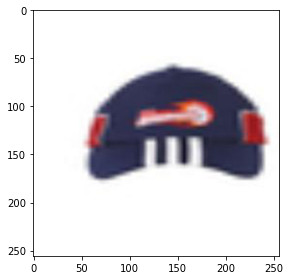

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                              Accessories
subCategory                                                    Headwear
articleType                                                        Caps
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                  ADIDAS Men Delhi Daredevil Blue Cap
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 3739, dtype: object


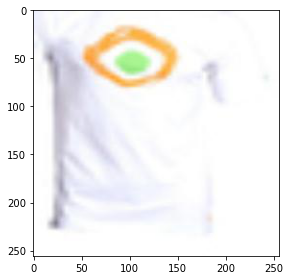

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                 Nike Men's Colors Team India T-shirt
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 2620, dtype: object


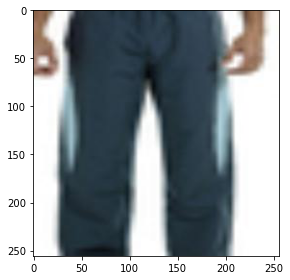

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                  Bottomwear
articleType                                                 Track Pants
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName               Reebok Men trackpant- male Track Pants
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 1607, dtype: object


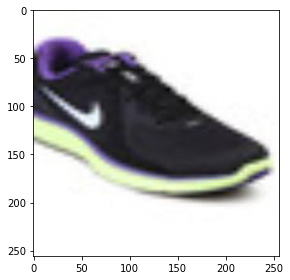

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        Black
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                     Nike Men's Lunarswift Black Shoe
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 3150, dtype: object


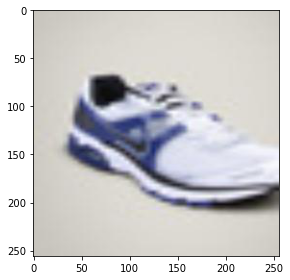

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                 Footwear
subCategory                                                       Shoes
articleType                                                Sports Shoes
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName              Nike Men's Air Max Moto White Blue Shoe
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 3159, dtype: object


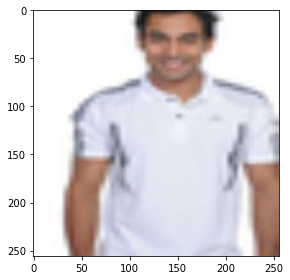

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                        White
season                                                             Fall
year                                                               2010
usage                                                            Casual
productDisplayName                  ADIDAS Mens Fire White Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 2040, dtype: object


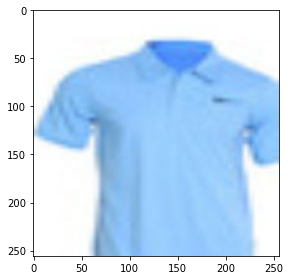

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                     Tshirts
baseColour                                                         Blue
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                          Nike Mens Blue Polo T-shirt
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 2272, dtype: object


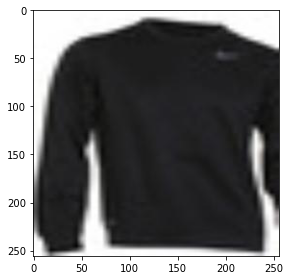

Image size:  (256, 256, 3)
gender                                                              Men
masterCategory                                                  Apparel
subCategory                                                     Topwear
articleType                                                 Sweatshirts
baseColour                                                        Black
season                                                             Fall
year                                                               2010
usage                                                            Sports
productDisplayName                            Nike Men Black Sweatshirt
url                   /home/jovyan/data_pipeline/data/output/39c004e...
Name: 2286, dtype: object


In [21]:
for ind in range(df.iloc[:10].shape[0]):
    row = df.iloc[ind]
    img = mpimg.imread(row['url'])
    imgplot = plt.imshow(img)
    plt.show()
    print('Image size: ', img.shape)
    print(row)